### 1. Import library

In [71]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import model_from_yaml

In [44]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [55]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

### 2. EDA

In [59]:
################################
###  need update new labels  ###
################################

path = "./img/train"
class_names = ['battery', 'cardboard','clothes','contaminated_plastic','glass', 'human', 'metal','pak','paper', 'pen', 'phone', 'plastic', 'trash_paper', 'wrapper']
total = 0

for name in class_names:
    name_path = os.path.join(path, name)
    num = len(os.listdir(name_path))
    total += num
    print("Number of " + name + " image:" + str(num))

print("Total number of image: " + str(total))

Number of battery image:357
Number of cardboard image:402
Number of clothes image:332
Number of contaminated_plastic image:132
Number of glass image:459
Number of human image:448
Number of metal image:342
Number of pak image:2
Number of paper image:293
Number of pen image:390
Number of phone image:508
Number of plastic image:411
Number of trash_paper image:70
Number of wrapper image:36
Total number of image: 4182


### 3. Pre-processing

In [60]:
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150
split = 0.2
total_val = total * split
total_train = total - total_val
print("Total number of training set: " + str(total_train))
print("Total number of validation set: " + str(total_val))

Total number of training set: 3345.6
Total number of validation set: 836.4000000000001


In [61]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=split,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5
                                   )

In [62]:
train_generator = data_generator.flow_from_directory(directory=path,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size=batch_size,
                                                    class_mode='sparse',
                                                    shuffle=True,
                                                    subset='training')

validation_generator = data_generator.flow_from_directory(directory=path,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size=batch_size,
                                                    class_mode='sparse',
                                                    shuffle=True,
                                                    subset='validation')

Found 3351 images belonging to 14 classes.
Found 831 images belonging to 14 classes.


In [63]:
labels = (train_generator.class_indices)
print(labels)

{'battery': 0, 'cardboard': 1, 'clothes': 2, 'contaminated_plastic': 3, 'glass': 4, 'human': 5, 'metal': 6, 'pak': 7, 'paper': 8, 'pen': 9, 'phone': 10, 'plastic': 11, 'trash_paper': 12, 'wrapper': 13}


### 4. Visualisation

In [49]:
def plotImg(img, label):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img[i])
        plt.xlabel(class_names[int(label[i])])
    plt.show()

In [64]:
sample_img_train, sample_label_train = next(train_generator)

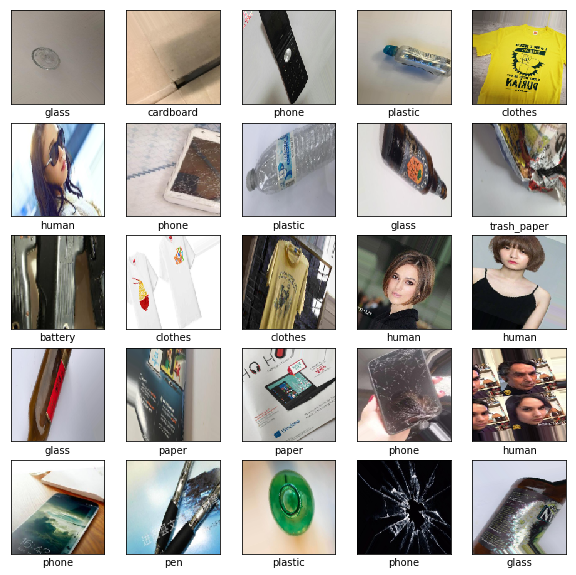

In [65]:
plotImg(sample_img_train, sample_label_train)

### 5. Model

In [66]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(9, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/20
 1/26 [>.............................] - ETA: 57s - loss: nan - acc: 0.0469

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


26/26 [==============================] - 49s 2s/step - loss: nan - acc: 0.0825 - val_loss: nan - val_acc: 0.0859
Epoch 2/20
26/26 [==============================] - 48s 2s/step - loss: nan - acc: 0.0884 - val_loss: nan - val_acc: 0.0859
Epoch 3/20
26/26 [==============================] - 49s 2s/step - loss: nan - acc: 0.0819 - val_loss: nan - val_acc: 0.0859
Epoch 4/20
26/26 [==============================] - 50s 2s/step - loss: nan - acc: 0.0841 - val_loss: nan - val_acc: 0.0859
Epoch 5/20
25/26 [===========================>..] - ETA: 1s - loss: nan - acc: 0.0908

KeyboardInterrupt: 

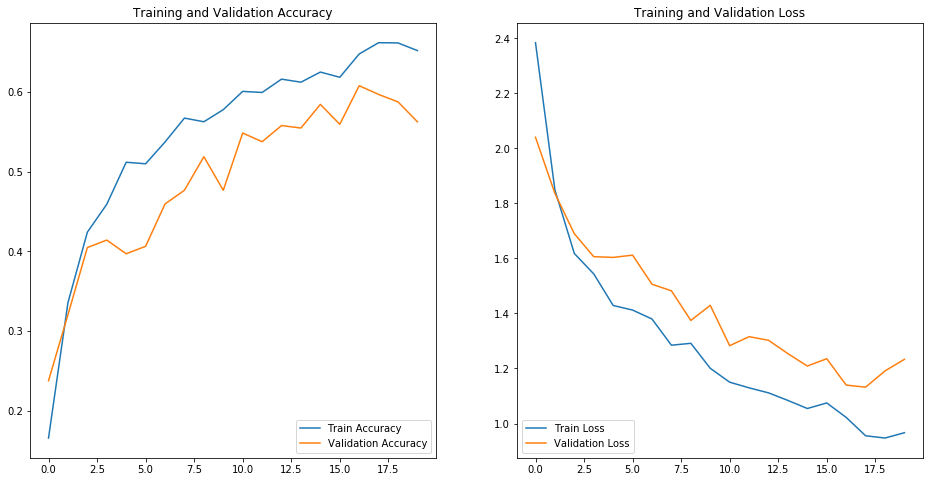

In [54]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()

In [72]:
model = Sequential([
    Conv2D(16, 3, padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(),
    Flatten(),
    Dense(256),
    LeakyReLU(alpha=0.1),
    Dense(9, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/20
 6/26 [=====>........................] - ETA: 24s - loss: nan - acc: 0.0784

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


18/26 [===================>..........] - ETA: 10s - loss: nan - acc: 0.0769

KeyboardInterrupt: 